# LEAD SCORING CASE STUDY

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [30]:
#Creating a data frame.
leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [31]:
#checking shape of the dataset
leads.shape

(9240, 37)

In [32]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [33]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


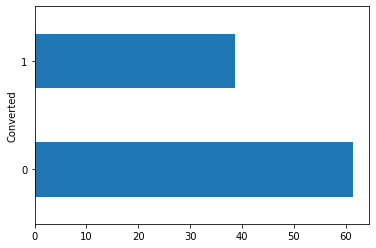

In [34]:
round(leads.Converted.value_counts(dropna=False,normalize= True)*100,2).plot.barh()
plt.ylabel('Converted')
plt.show()

- We can see that overall conversion rate of the whole data is 38.5%

### Handling Missing Values

In [35]:
#checking the null values in the columns
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [36]:
#checking null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [37]:
cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 35):
        leads.drop(i, 1, inplace = True)
        
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [38]:
#checking null values percentage again

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [39]:
#Checking the null columns and trying to fill them. Lets start with country column.
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Nigeria                    4
South Africa               4
Kuwait                     4
Germany                    4
Sweden                     3
Netherlands                2
Philippines                2
Belgium                    2
Uganda                     2
China                      2
Bangladesh                 2
Ghana                      2
Asia/Pacific Region        2
Italy                      2
Denmark                    1
Kenya                      1
Switzerland                1
Malaysia                   1
Tanzania                   1
Sri Lanka     

In [40]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India
leads.Country = leads.Country.replace(np.nan,'India')

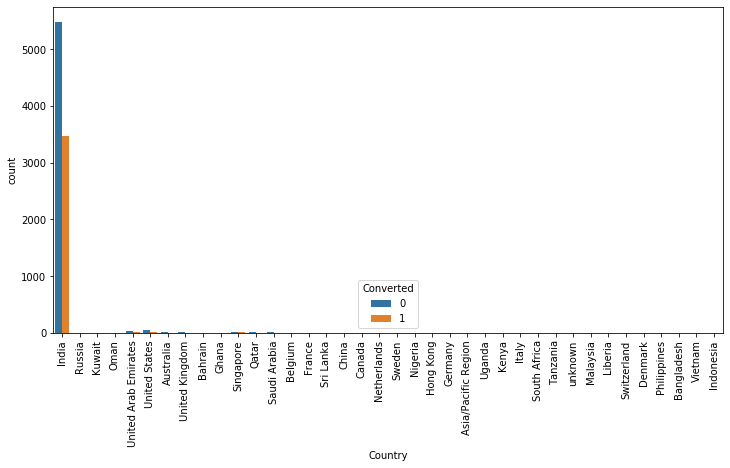

In [41]:
#plotting spread of Country columnn 
plt.figure(figsize=(12,6))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [42]:
#As majority of the values is India i.e. more than 95% we will drop this column.
#We will create a list of cols_to_drop and then drop them at the end.
cols_to_drop = ['Country']
cols_to_drop


['Country']

In [43]:
#checking value counts of "City" column

leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [44]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')
leads.City.value_counts(dropna=False)

Mumbai                         4642
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

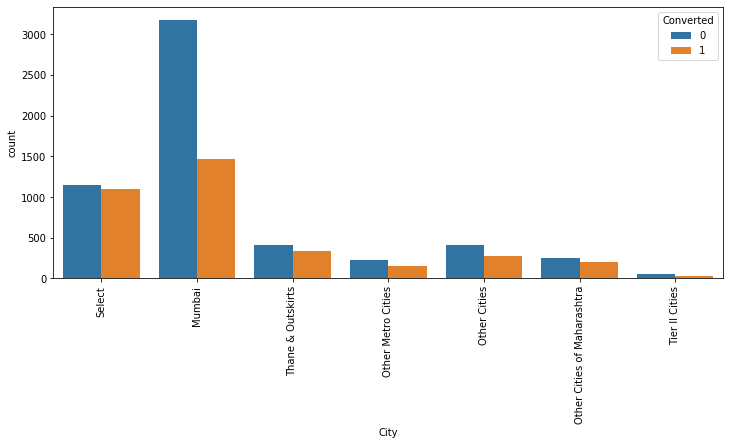

In [45]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(12,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [46]:
#we can add the city column also to drop as the major values are either Mumbai or Select which is not correct.
cols_to_drop.append('City')
cols_to_drop

['Country', 'City']

In [47]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [48]:
#As there are not particular specialization which is occuring most of the time lets replace the null with not specified.
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

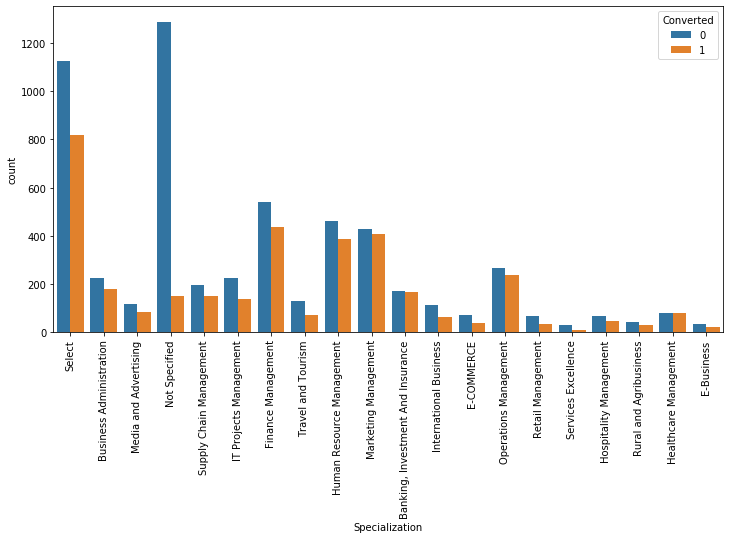

In [49]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(12,6))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we can see all the Management type of Specilizations are showing similar patterns lets merge them into Management.

In [50]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

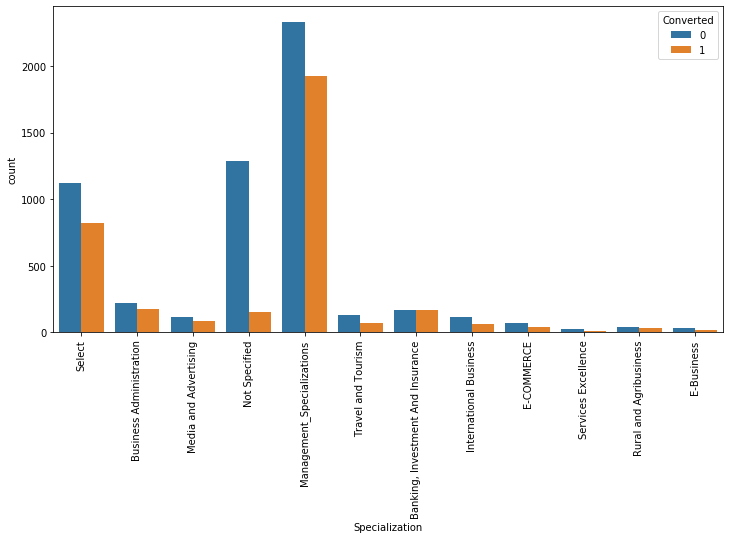

In [51]:
#plotting spread of Specialization columnn after combining the managemnet specilaziation

plt.figure(figsize=(12,6))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [52]:
#checking the column 'What is your current occupation'

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [53]:
#As the unemployed is occuring more we will replace the null values with Unemployed
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN,'Unemployed')

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

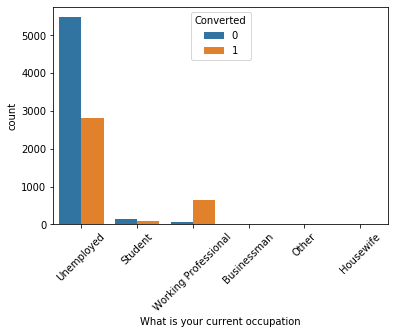

In [54]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

### Inference

- As we can see the maximum lead is generated from Unemployed Category.
- The conversion is high in case of Working professional.

In [55]:
#Checking the column What matters most to you in chossing a course
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [56]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'City', 'What matters most to you in choosing a course']

In [57]:
#After conversion checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We dont need some columns so adding them to the list of cols_to_drop

In [58]:
cols_to_drop.extend(['How did you hear about X Education','Lead Profile','Prospect ID','Lead Number'])
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number']

In [59]:
#checking  the Lead Source column
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
blog                    1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
youtubechannel          1
Name: Lead Source, dtype: int64

In [60]:
#replacing Nan Values with Others and the other low frequency value by Others
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')     

In [61]:
leads['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64

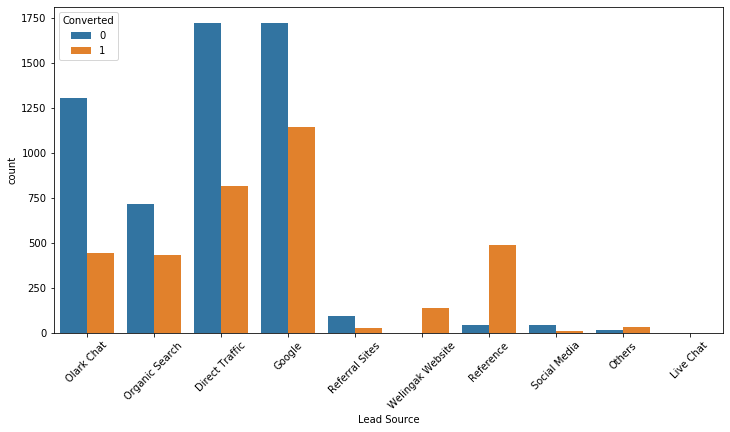

In [62]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(12,6))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

## Inference

- Maximum number of leads are generated by Google and Direct traffic.
- Conversion Rate of reference leads and leads through welingak website is high.

In [63]:
#Checking the last activity columns
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [64]:
#there is no significance of last activity variable so adding it to the cols_to_drop
cols_to_drop.append('Last Activity')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity']

In [65]:
#Checking the lead origin variable
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

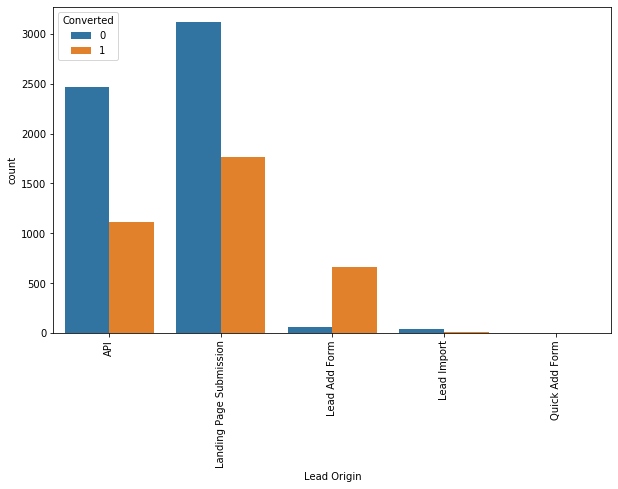

In [66]:
#visualizing the Variable

plt.figure(figsize=(10,6))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

## Inference
- API and Landing Page Submission bring higher number of leads but and the conversion rate for them is around 50%.
- Lead Add Form has a very high conversion rate but count of leads is less.
- Lead Import and Quick Add Form get very few leads.

In [67]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [68]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call']

In [69]:
#checking value counts for Do Not Call
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

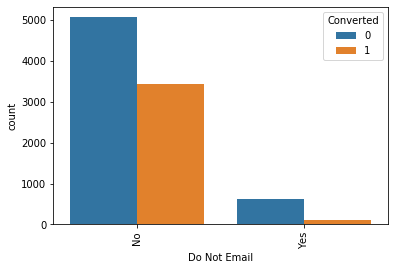

In [70]:
#visualizing the Variable Do not Email

plt.figure()
s1=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [71]:
#checking the search variable
leads.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [72]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('Search')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search']

In [73]:
#checking the Magazine variable
leads.Magazine.value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [74]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('Magazine')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search',
 'Magazine']

In [75]:
#checking the newspaper Article variable
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [76]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('Newspaper Article')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article']

In [77]:
#checking the X Education Forums variable
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [78]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('X Education Forums')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums']

In [79]:
#checking for the newspaper variable
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [80]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('Newspaper')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper']

In [81]:
#checking the Digital Advertisement variable
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [82]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('Digital Advertisement')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement']

In [83]:
#Checking the Through Recommendations variable
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [84]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('Through Recommendations')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [85]:
#checking the variable Receive More Updates About Our Courses
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [86]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('Receive More Updates About Our Courses')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses']

In [87]:
#checking the variable Update me on Supply Chain Content
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [88]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('Update me on Supply Chain Content')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content']

In [89]:
#checking on the variable Get updates on DM content
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [90]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('Get updates on DM Content')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content']

In [91]:
#checking the variable I agree to pay the amount through cheque
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [92]:
#As the No values is very high we can simply add this column to the cols_to_drop
cols_to_drop.append('I agree to pay the amount through cheque')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [93]:
#checking the variable A free copy of Mastering the Interview
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

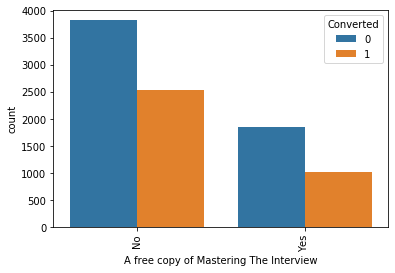

In [94]:
#visualizing the Variable A free copy of Mastering The Interview

plt.figure()
s1=sns.countplot(leads['A free copy of Mastering The Interview'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [95]:
#checking the variable last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [96]:
#As there is no significance of Last Notable Activity we can add this variable to the cols_to_drop list
cols_to_drop.append('Last Notable Activity')
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'How did you hear about X Education',
 'Lead Profile',
 'Prospect ID',
 'Lead Number',
 'Last Activity',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Last Notable Activity']

In [97]:
#Dropping all the columns which needs to be dropped.
leads = leads.drop(cols_to_drop,1)

In [98]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Select,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Select,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Select,Unemployed,No


In [99]:
leads.shape

(9240, 10)

In [100]:
#After dropping the columns checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
dtype: float64

In [101]:
#dropping the null values as the number is very low
leads = leads.dropna()

In [102]:
#checking percentage of missing values if any
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

# Checking the Numerical columns

In [103]:
# let's look at the colums of the final dataframe
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 10 columns):
Lead Origin                               9103 non-null object
Lead Source                               9103 non-null object
Do Not Email                              9103 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9103 non-null int64
Page Views Per Visit                      9103 non-null float64
Specialization                            9103 non-null object
What is your current occupation           9103 non-null object
A free copy of Mastering The Interview    9103 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 782.3+ KB


In [104]:
# let's look at the statistical aspects of the final dataframe
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


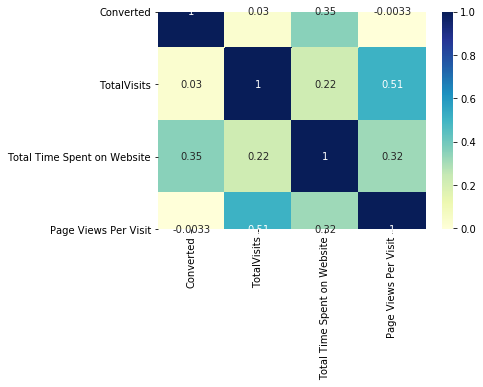

In [105]:
#Checking correlations of numeric values
plt.figure()

# heatmap
sns.heatmap(leads.corr(), annot=True, cmap = 'YlGnBu')
plt.show()

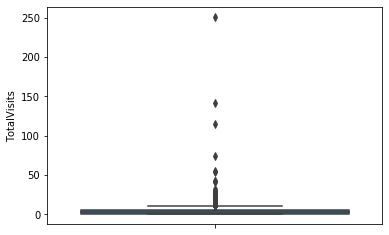

In [106]:
#checking for any outliers present in TotalVisits variable
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

- We can see presence of outliers here we will remove few outliers

In [107]:
#checking the percentile values for "TotalVisits"
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

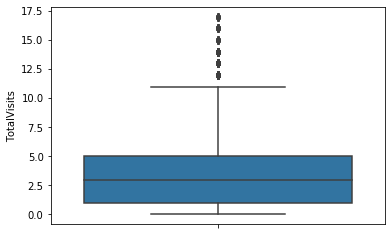

In [108]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

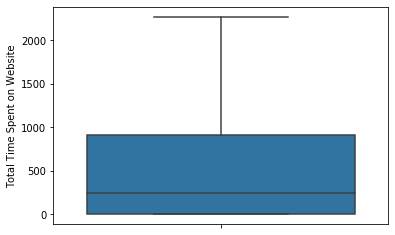

In [109]:
#checking for any outliers present in TotalVisits variable
plt.figure()
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

- We can see that there are no outliers present for this column so we will move ahead

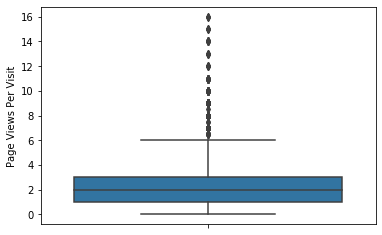

In [110]:
#checking for any outliers present in Page Views Per Visit variable
plt.figure()
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()


- We can see presence of outliers here we will remove few outliers

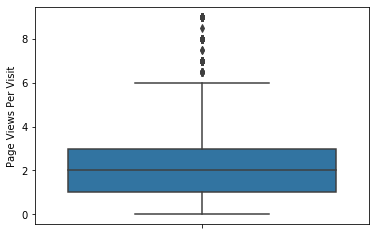

In [111]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[(leads['Page Views Per Visit'] <= Q3)]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[(leads['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [112]:
#As we have removed few outliers lets check for the shape again.
leads.shape

(8953, 10)

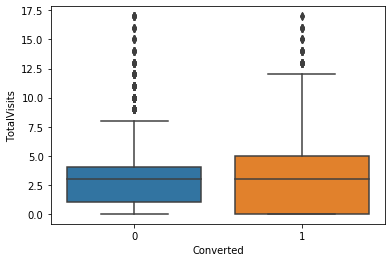

In [113]:
#checking the boxplot of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

## Inference

- Median for converted and not converted leads are very close.
- Nothng conclusive can be said on the basis of Total Visits

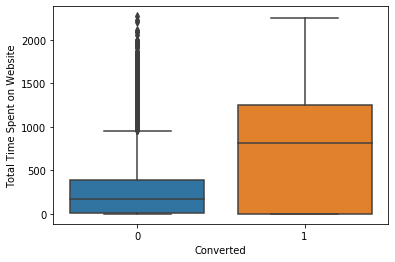

In [114]:
#checking the boxplot of "Total Time Spent on Website" vs Converted variable
sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

## Inference

- Leads spending more time on the website are more likely to be converted.

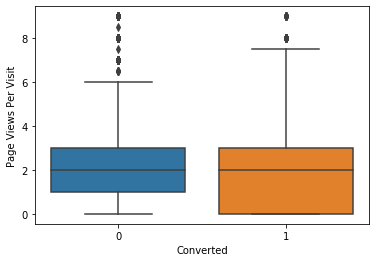

In [115]:
#checking the boxplot of "Page Views Per Visit" vs Converted variable
sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

## Inference

- Median for converted and unconverted leads is same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

# Dummy Variable Creation:

In [116]:
#converting the Yes and no columns to 0 for No and 1 for Yes.

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [117]:
#verifying
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Select,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Select,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Select,Unemployed,0


In [118]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [119]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'Specialization'
dummy1 = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
# Dropping Specialization_Not Specified column
dummy1 = dummy1.drop(['Specialization_Not Specified'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis = 1)

# Creating dummy variables for the variable 'Lead Source'
dummy2 = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
# Dropping Lead Source_Others column
dummy2 = dummy2.drop(['Lead Source_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, dummy2], axis = 1)

In [120]:
#getting a list of categorical columns
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [121]:
leads.drop(cat_cols,1,inplace = True)
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,...,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0



# Model Building

In [122]:
#importing libraries 
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [123]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [124]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [125]:
#importing required libraries
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
9196,-0.28572,0.668862,1.848117,1.455819,-0.667339,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4696,-0.28572,-0.030697,-0.037832,0.399961,-0.667339,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3274,-0.28572,0.319082,-0.642138,-0.127967,-0.667339,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2164,-0.28572,-0.380477,-0.154676,-0.127967,-0.667339,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1667,-0.28572,0.319082,1.258415,-0.481679,-0.667339,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Model Building using Stats Model & RFE

In [127]:
#importing the necessary libraries
import statsmodels.api as sm

### Feature Selection Using RFE

In [128]:
#Importing necesary libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [129]:
rfe.support_

array([False, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False, False,  True, False,  True])

In [130]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 8),
 ('What is your current occupation_Student', False, 6),
 ('What is your current occupation_Unemployed', False, 7),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_International Business', True, 1),
 ('Specialization_Management_Specializations', True, 1),
 ('Specialization_Media and Advertising', True, 1),
 ('Specializa

In [131]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness', 'Specialization_Select',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website'],
      dtype='object')

In [132]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Specialization_E-Business', 'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Social Media'],
      dtype='object')

### Assessing the model with StatsModels

In [133]:
#BUILDING MODEL
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2962.5
Date:                Mon, 14 Jun 2021   Deviance:                       5925.0
Time:                        20:16:48   Pearson chi2:                 6.38e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5998      0.090    -17.851      0.000      -1.775      -1.424
Total Time Spent on Website                              0.9473      0.034     28.138      0.000       0.881       1.013
Lead Origin_Lead Add Form                                3.6692      0.235     15.589      0.000       3.208       4.130
What is your current occupation_Housewife               22.4850   1.83e+04      0.001      0.999   -3.59e+04     3.6e+04
What is your current occupation_Working Professional     2.7853      0.189     14.767      0.000       2.416       3.155
Specialization_Banking, Investment And Insurance         1.3021      0.185      7.027      0.000       0.939       1.665
Specialization_Business Administration                   0.8947      0.179      5.003      0.000       0.544       1.245
Specialization_E-COMMERCE                                1.0117      0.285      3.548      0.000       0.453       1.571
Specialization_International Business                    1.1021      0.234      4.703      0.000       0.643       1.561
Specialization_Management_Specializations                0.9390      0.104      9.038      0.000       0.735       1.143
Specialization_Media and Advertising                     0.7755      0.223      3.482      0.000       0.339       1.212
Specialization_Rural and Agribusiness                    1.1957      0.346      3.453      0.001       0.517       1.874
Specialization_Select                                    1.0737      0.113      9.520      0.000       0.853       1.295
Lead Source_Direct Traffic                              -0.6143      0.077     -7.941      0.000      -0.766      -0.463
Lead Source_Referral Sites                              -0.7815      0.307     -2.549      0.011      -1.382      -0.181
Lead Source_Welingak Website                             2.2095      1.032      2.141      0.032       0.187       4.232
========================================================================================================================
"""

In [134]:
#dropping the column with high p-value
col = col.drop('What is your current occupation_Housewife',1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness', 'Specialization_Select',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website'],
      dtype='object')

In [135]:
#BUILDING MODEL 2
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2965.6
Date:                Mon, 14 Jun 2021   Deviance:                       5931.2
Time:                        20:16:48   Pearson chi2:                 6.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5994      0.090    -17.848      0.000      -1.775      -1.424
Total Time Spent on Website                              0.9467      0.034     28.136      0.000       0.881       1.013
Lead Origin_Lead Add Form                                3.6766      0.235     15.628      0.000       3.215       4.138
What is your current occupation_Working Professional     2.7823      0.189     14.752      0.000       2.413       3.152
Specialization_Banking, Investment And Insurance         1.3031      0.185      7.032      0.000       0.940       1.666
Specialization_Business Administration                   0.8958      0.179      5.009      0.000       0.545       1.246
Specialization_E-COMMERCE                                1.0132      0.285      3.554      0.000       0.454       1.572
Specialization_International Business                    1.1033      0.234      4.708      0.000       0.644       1.563
Specialization_Management_Specializations                0.9423      0.104      9.072      0.000       0.739       1.146
Specialization_Media and Advertising                     0.8125      0.220      3.688      0.000       0.381       1.244
Specialization_Rural and Agribusiness                    1.1966      0.346      3.456      0.001       0.518       1.875
Specialization_Select                                    1.0731      0.113      9.516      0.000       0.852       1.294
Lead Source_Direct Traffic                              -0.6177      0.077     -7.986      0.000      -0.769      -0.466
Lead Source_Referral Sites                              -0.7819      0.307     -2.551      0.011      -1.383      -0.181
Lead Source_Welingak Website                             2.2014      1.032      2.133      0.033       0.179       4.224
========================================================================================================================
"""

- Since the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

### Checking VIF

In [136]:
#importing required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Management_Specializations,1.70
11,Lead Source_Direct Traffic,1.65
1,Lead Origin_Lead Add Form,1.58
13,Lead Source_Welingak Website,1.35
2,What is your current occupation_Working Profes...,1.19
10,Specialization_Select,1.12
0,Total Time Spent on Website,1.11
4,Specialization_Business Administration,1.06
3,"Specialization_Banking, Investment And Insurance",1.05
5,Specialization_E-COMMERCE,1.03


### The VIF Values seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [138]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.748855
4696    0.191486
3274    0.220101
2164    0.337891
1667    0.630469
7024    0.205546
8018    0.081277
778     0.210792
6942    0.205546
4440    0.169535
dtype: float64

In [139]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.74885479, 0.19148608, 0.22010104, 0.33789087, 0.63046864,
       0.20554618, 0.08127686, 0.21079237, 0.20554618, 0.1695348 ])

### Creating a dataframe with the actual converted leads and the predicted probabilities

In [140]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Lead_Score
0,1,0.748855,9196,75
1,0,0.191486,4696,19
2,0,0.220101,3274,22
3,0,0.337891,2164,34
4,1,0.630469,1667,63


### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [141]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Lead_Score,Predicted
0,1,0.748855,9196,75,1
1,0,0.191486,4696,19,0
2,0,0.220101,3274,22,0
3,0,0.337891,2164,34,0
4,1,0.630469,1667,63,1


In [142]:
#importing libraries for deriving confusion matrix
from sklearn import metrics

In [143]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3429  453]
 [ 891 1494]]


In [144]:
            # Predicted     not_conv    conv
# Actual
# not_conv                    3429      453
# conv                        891       1494  

In [145]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7855433221637147


## Metrics beyond simply accuracy

In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6264150943396226

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.883307573415765

In [149]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11669242658423493


In [150]:
# positive predictive value 
print (TP / float(TP+FP))

0.7673343605546995


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.79375


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [152]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [153]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

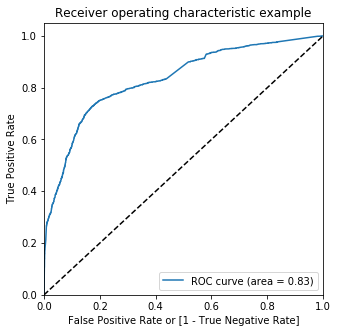

In [154]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Area under the curve is 0.83 which is very close to 1 so we can say that prediction power of modal is very well.

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [155]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.748855,9196,75,1,1,1,1,1,1,1,1,1,0,0
1,0,0.191486,4696,19,0,1,1,0,0,0,0,0,0,0,0
2,0,0.220101,3274,22,0,1,1,1,0,0,0,0,0,0,0
3,0,0.337891,2164,34,0,1,1,1,1,0,0,0,0,0,0
4,1,0.630469,1667,63,1,1,1,1,1,1,1,1,0,0,0


In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.487634  0.973585  0.189078
0.2   0.2  0.632998  0.903564  0.466770
0.3   0.3  0.770863  0.761006  0.776919
0.4   0.4  0.793522  0.700210  0.850850
0.5   0.5  0.785543  0.626415  0.883308
0.6   0.6  0.770385  0.526205  0.920402
0.7   0.7  0.745492  0.411321  0.950799
0.8   0.8  0.725068  0.310692  0.979650
0.9   0.9  0.697463  0.215094  0.993818


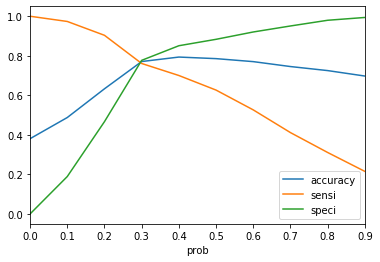

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [158]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Lead_Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.748855,9196,75,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.191486,4696,19,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.220101,3274,22,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.337891,2164,34,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.630469,1667,63,1,1,1,1,1,1,1,1,0,0,0,1


In [159]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7708632519546833

In [160]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3016,  866],
       [ 570, 1815]], dtype=int64)

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7610062893081762

In [163]:
# Let us calculate specificity
TN / float(TN+FP)

0.7769191138588356

In [164]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.22308088614116434


In [165]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6769861991794107


In [166]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8410485220301172


### Precision and Recall

In [167]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3016,  866],
       [ 570, 1815]], dtype=int64)

In [168]:
# Precision
#TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6769861991794107

In [169]:
# Recall
#TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7610062893081762

#### Using sklearn utilities for the same

In [170]:
#importing the libraries
from sklearn.metrics import precision_score, recall_score

In [171]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6769861991794107

In [172]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7610062893081762

### Precision and recall tradeoff

In [173]:
#importing libraries
from sklearn.metrics import precision_recall_curve

In [174]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted

(0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: Converted, Length: 6267, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6262    0
 6263    1
 6264    0
 6265    0
 6266    1
 Name: final_Predicted, Length: 6267, dtype: int64)

In [175]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

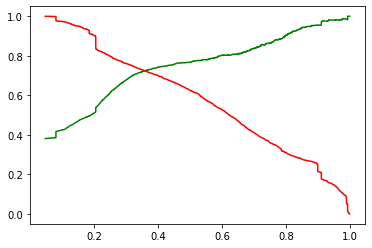

In [176]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [177]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
7681,-0.285720,0.668862,-0.304384,0.135997,1.498489,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
984,-0.285720,-0.030697,-0.538073,0.399961,1.498489,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8135,3.499924,-0.380477,0.794688,-0.127967,1.498489,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6915,-0.285720,0.319082,-0.614753,-0.127967,1.498489,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2712,-0.285720,-0.030697,-0.412100,0.399961,-0.667339,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [178]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Select,Lead Source_Direct Traffic,Lead Source_Referral Sites,Lead Source_Welingak Website
7681,-0.304384,0,0,0,0,0,0,1,0,0,0,1,0,0
984,-0.538073,0,0,0,0,0,0,1,0,0,0,0,0,0
8135,0.794688,0,0,0,1,0,0,0,0,0,0,1,0,0
6915,-0.614753,0,0,0,0,0,0,1,0,0,0,0,0,0
2712,-0.412100,0,0,0,0,0,0,0,0,0,1,0,0,0


In [179]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [180]:
y_test_pred = res.predict(X_test_sm)

In [181]:
y_test_pred[:10]

7681    0.173216
984     0.237478
8135    0.361487
6915    0.224584
2712    0.285688
244     0.419387
4698    0.190567
8287    0.081277
6791    0.521506
8970    0.311005
dtype: float64

In [182]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [183]:
# Let's see the head
y_pred_1.head()

,0
7681,0.173216
984,0.237478
8135,0.361487
6915,0.224584
2712,0.285688


In [184]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [185]:
# Putting ProspectID to index
y_test_df['Prospect ID'] = y_test_df.index

In [186]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [187]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [188]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.173216
1,0,984,0.237478
2,0,8135,0.361487
3,0,6915,0.224584
4,1,2712,0.285688


In [189]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [190]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.173216
1,0,984,0.237478
2,0,8135,0.361487
3,0,6915,0.224584
4,1,2712,0.285688


In [191]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [192]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.173216,17
1,984,0,0.237478,24
2,8135,0,0.361487,36
3,6915,0,0.224584,22
4,2712,1,0.285688,29


In [193]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [194]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.173216,17,0
1,984,0,0.237478,24,0
2,8135,0,0.361487,36,1
3,6915,0,0.224584,22,0
4,2712,1,0.285688,29,0


In [195]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7769918093819806

In [196]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1304,  372],
       [ 227,  783]], dtype=int64)

In [197]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [198]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7752475247524753

In [199]:
# Let us calculate specificity
TN / float(TN+FP)

0.7780429594272077

In [200]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6779220779220779

In [201]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7752475247524753

## Observation:
#### After running the model on the Test Data these are the figures we obtain:

- Accuracy : 78.55%
- Sensitivity : 62.64%
- Specificity : 88.33%


## Final Observation:
#### Let us compare the values obtained for Train & Test:

Train Data: 
- Accuracy : 78.55%
- Sensitivity : 62.64%
- Specificity : 88.33%

Test Data: 
- Accuracy : 77.69%
- Sensitivity : 77.52%
- Specificity : 77.80%

The Model seems to predict a good Conversion Rate and we can make calls based on this model